<a href="https://colab.research.google.com/github/EdwinAMG/Computaci-n-cientifica/blob/main/Agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Técnica de agrupación por K - Means**

In [ ]:
#Importar librerias
#Tratamiento de datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#Modelado
from sklearn.cluster import KMeans

#Evaluación
from sklearn.metrics import silhouette_score

#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Configurar gráficos
plt.rcParams['figure.figsize'] = (10,8)
plt.style.use('ggplot')


In [ ]:
#Importar datos
datos = pd.read_csv('analisis.csv')
datos.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
#Exploración de datos
datos.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


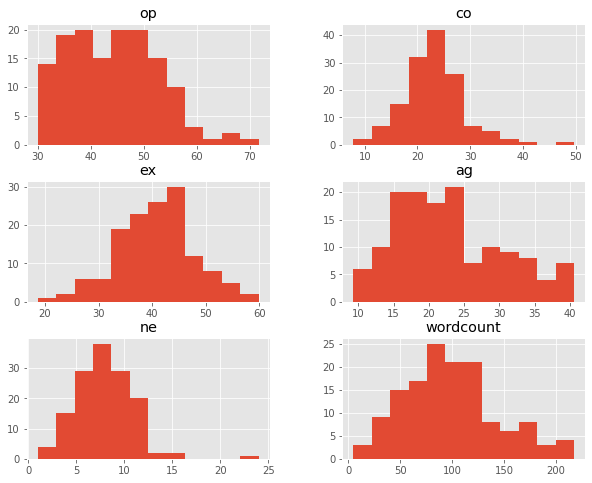

In [ ]:
#Graficar los dato spara ver el comportamiento
#k = rqd(n) n es el tamaño de la muestra y este es el bins (invervalos de clase)
datos.drop(['categoria'], axis = 1).hist(bins = 12)
plt.show()

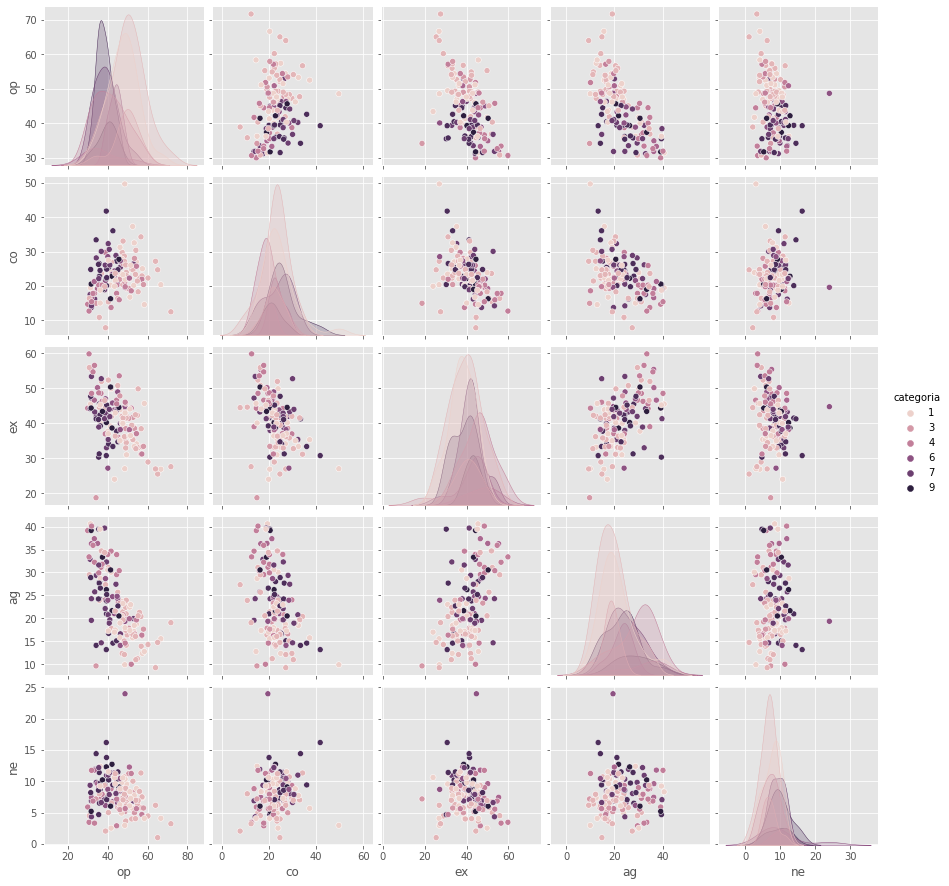

In [ ]:
 ##Sb es el cruce de variable con variable y se le cambió el color a cada categorpia para entender si hay variables que repliquen a las otras para poder eliminar o mantener variables
 sb.pairplot(data = datos, vars = ['op','co','ex','ag','ne'], hue = 'categoria', kind = 'scatter')
 plt.show()

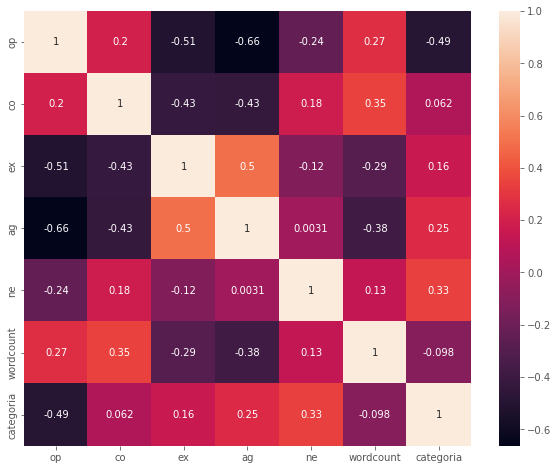

In [ ]:
sb.heatmap(data = datos.drop(['usuario'], axis = 1).corr(), annot = True)
plt.show()

In [ ]:
##Preparar los datos
X = np.array(datos[['op','ex','ag']])
y = np.array(datos['categoria'])


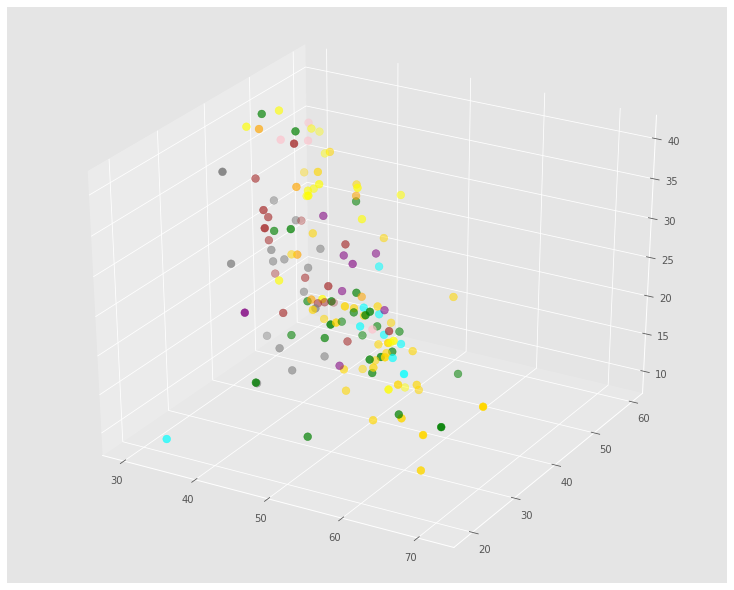

In [ ]:
##Vuelve la figura un eje de tres dimensiones
fig = plt.figure()
ax = Axes3D(fig)

colores = ['blue','green','gold','cyan','yellow','pink','purple','brown','gray','orange','black']
asignar = []

for i in y:
  asignar.append(colores [i])

ax.scatter(X[:,0], X[:,1], X[:,2], c = asignar, s = 60)
plt.show()

#**Modelo k -means**


In [ ]:
#n_init es la semilla para que ubique los puntos centrales, para clusters 2 es cuando no sé cuántos son pero deben se rmenos que la cant de categorias y el 25 es aleatorio 
modelo = KMeans(n_clusters=5,
                n_init = 25,
                random_state=123).fit(X) 

In [ ]:
centros = modelo.cluster_centers_
centros

array([[40.14744474, 43.54690971, 23.11790265],
       [58.70462307, 30.53566167, 15.72207033],
       [50.42588653, 40.66723528, 17.30892463],
       [42.75925435, 32.7509888 , 21.08881555],
       [35.90241306, 47.56828232, 33.58748762]])

In [ ]:
#Asignación del inidividuo al centro
labels = modelo.predict(X)

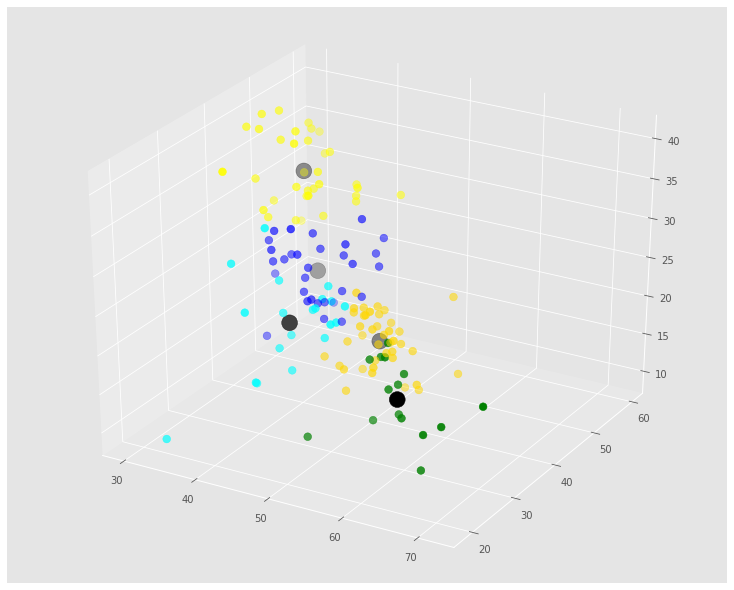

In [ ]:
colores = ['blue','green','gold','cyan','yellow']
asignar = []

for i in labels:
  asignar.append(colores[i])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c = asignar, s = 60)
ax.scatter(centros[:,0], centros[:,1], centros[:,2], c = 'black', marker = '.', s= 1000)
plt.show()

# Para definir el mejor valor de **K**

Text(0.5, 1.0, 'Selección de grupos')

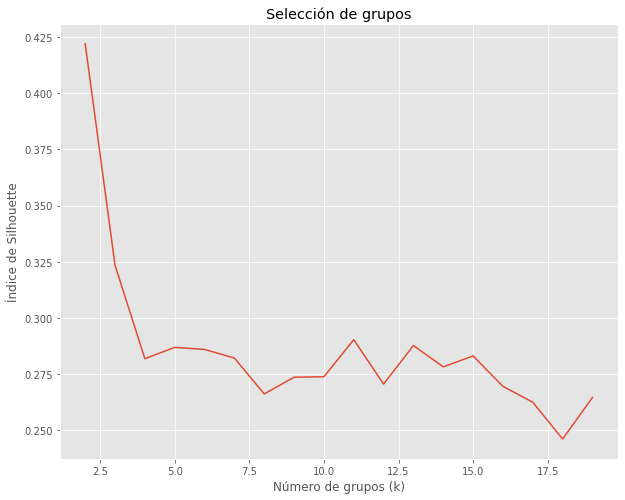

In [ ]:
#Mejor K
numeroCluster = range(2,20)
valoresIndice = []

for n_cluster in numeroCluster:
  modeloKMeans = KMeans(n_clusters = n_cluster)
  labels = modeloKMeans.fit_predict(X)
  mediaSilouhette = silhouette_score(X, labels)
  valoresIndice.append(mediaSilouhette)

plt.plot(numeroCluster, valoresIndice)
plt.xlabel('Número de grupos (k)')
plt.ylabel('Índice de Silhouette')
plt.title('Selección de grupos')
#En esta selección encontramos el mejor K = 2 y son los grupos del modelo

#**Modelo Final Kmeans**

In [ ]:
#n_init es plantar una semilla, tratando de acercarnos más a los centros y que el modelo funcione mejor
modeloFinal = KMeans(n_clusters= 2, n_init = 25, random_state = 123)

In [ ]:
modeloFinal.fit(X)
label = modeloFinal.predict(X)
centros =  modeloFinal.cluster_centers_

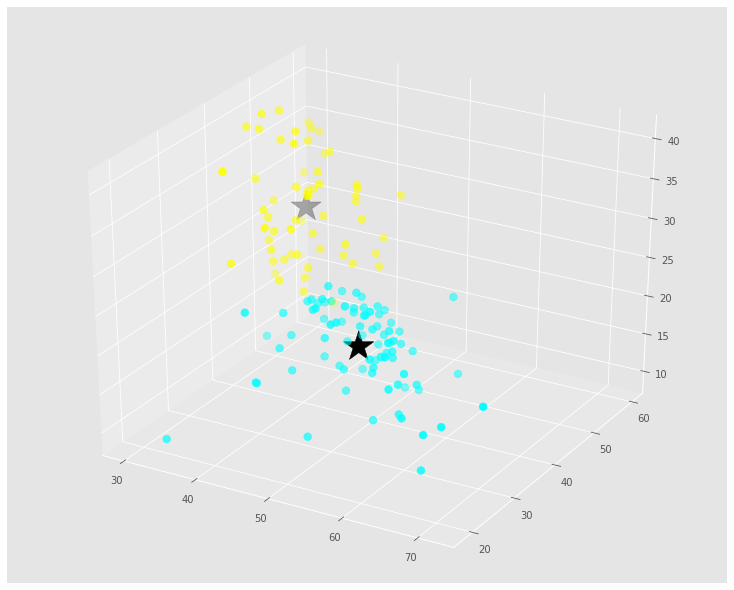

In [ ]:
colores = ['yellow', 'cyan']
asignar = []

for i in label:
  asignar.append(colores[i])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c = asignar, s=60)
ax.scatter(centros[:,0],centros[:,1],centros[:,2], c= 'black', marker='*', s=1000)
plt.show() 

#**Técnica de agupación por Aglomerativo Jerárquico**

Parte de un grupo por individuo hasta un grupo con todos los individuos, uniéndo de dos en dos vía afinidad (una forma de encontrar la cercanía entre varios individuos)

**¿Qué hace?**
1. Determina que cada individuo es un grupo.
2. Calcula las distancias entre cada individuo y agrupa pares vía la menor distancia.
3. Sigue iterando el paso 2 hasta que todos sean un solo grupo.
4. Después de hacer el agrupamiento por afinidad, se construye un dendrograma.
5. Cortamos de dendrograma en la mitad de la mayor distancia y seleccionamos por grupos las líneas verticales cortadas. *Nos dice la cantidad de grupos.*

**Tipos de afinidad**
- Afinidad completa: Tengo dos conjuntos de individuos, y la forma de calcular la distancia es por la mayor, pues se queda con la mayor distancia dada en el grupo, pero agrupa por la mayor distancia que dio menor entre los grupos comparados.
- Afinidad simple: Se guía por la menor distancia.
-Afinidad promedio: Calcula todas las posibles distancias y las promedia y se queda con ese promedio.
-Afinidad por triangulación o combinada: Determina un punto central entre los individuos del grupo y determina la distancia. Ward: Se hace la triangulación vía mayor varianza.

In [ ]:
#Modelado
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [ ]:
#Función para dibujar el dendrograma
def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
##Vamos a crear tres modelos distintos por diferentes métodos de afinidad
#AFINIDAD COMPLETA
clusterCompleto = AgglomerativeClustering(affinity= 'euclidean',
                                          linkage= 'complete',
                                          n_clusters= None,
                                          distance_threshold= 0)
clusterCompleto.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [ ]:
#AFINIDAD PROMEDIO
clusterPromedio = AgglomerativeClustering(affinity= 'euclidean',
                                          linkage= 'average',
                                          n_clusters= None,
                                          distance_threshold= 0)
clusterPromedio.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [ ]:
#AFINIDAD POR TRIANGULACIÓN (Ward)
clusterWard = AgglomerativeClustering(affinity= 'euclidean',
                                          linkage= 'ward',
                                          n_clusters= None,
                                          distance_threshold= 0)
clusterWard.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

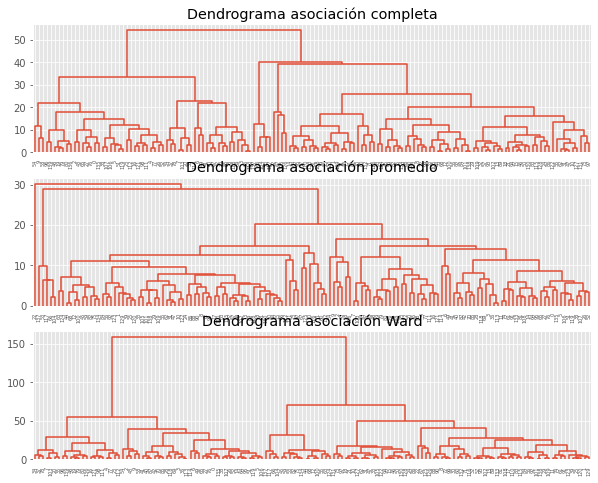

In [ ]:
fig, ax = plt.subplots(3,1)
dibujarDendrograma(clusterCompleto, color_threshold = 0, ax = ax[0])
ax[0].set_title('Dendrograma asociación completa')
dibujarDendrograma(clusterPromedio, color_threshold = 0, ax = ax[1])
ax[1].set_title('Dendrograma asociación promedio')
dibujarDendrograma(clusterWard, color_threshold = 0, ax = ax[2])
ax[2].set_title('Dendrograma asociación Ward')
plt.show()
#Con esto seleccionamos nuestro mejor método

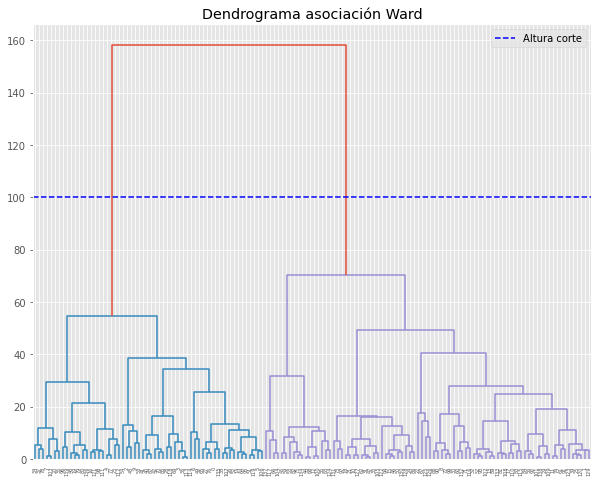

In [ ]:
fig, ax = plt.subplots(1,1)
alturaCorte = 100
dibujarDendrograma(clusterWard, color_threshold = alturaCorte, ax = ax)
ax.set_title('Dendrograma asociación Ward')
ax.axhline (y = alturaCorte, c= 'blue', linestyle ='--', label = 'Altura corte')
ax.legend()
plt.show()

#**Modelo Final Aglomerativo jerárquico**

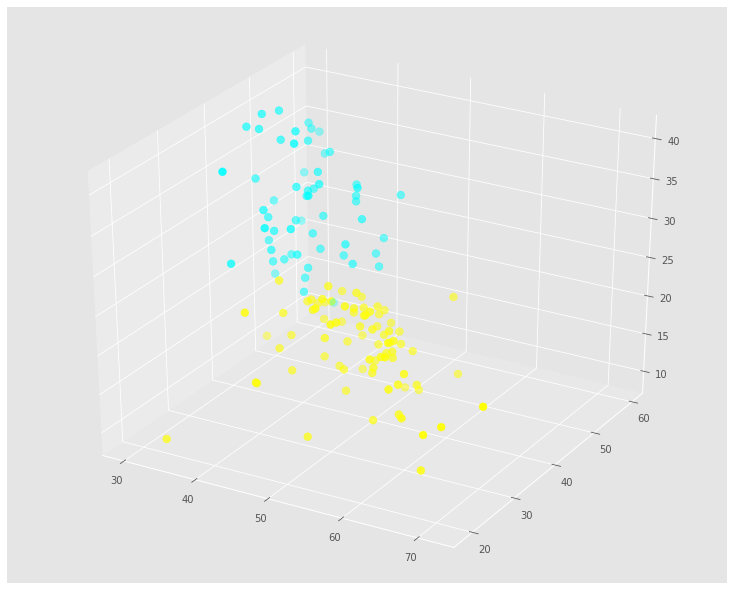

In [ ]:
#Modelo final de aglomeramiento jerárquico
modeloFinal = AgglomerativeClustering(affinity = 'euclidean',
                                      linkage= 'ward',
                                      n_clusters = 2)
modeloFinal.fit(X)
grupos = modeloFinal.labels_

colores = ['yellow', 'cyan']
asignar = []

for i in grupos:
  asignar.append(colores[i])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c = asignar, s=60)
plt.show() 

#**Técnica de agrupación por DBSCAN (Método de búsqueda)**

Lo utilizamos cuando tenemos muchas muestras, donde el kmeans y el jeráquico empiezan a ser poco eficientes y cuando no puedo hacer la separación de grupos. Este método es de *Emergencia*.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
modeloDbscan = DBSCAN(eps =0.2, min_samples = 5, metric = 'euclidean')
modeloDbscan.fit(X)

DBSCAN(eps=0.2)

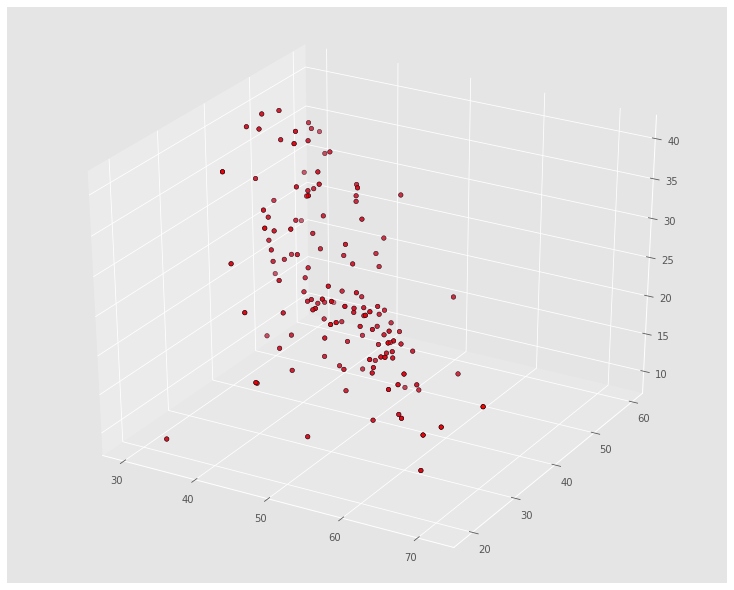

In [ ]:
labels = modeloDbscan.labels_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], c=labels, marker = 'o', edgecolor='black')
ax.scatter(X[labels == -1,0], X[labels == -1,1], X[labels == -1,2], c = 'red', marker='o', edgecolor='black', label ='ruido')
ax.legend
plt.show()
#En este ejercicio todos los identificó como ruido, para que esto no ocurra, aumentamos el epsilon

In [ ]:
modeloDbscan = DBSCAN(eps =5, min_samples = 10, metric = 'euclidean')
modeloDbscan.fit(X)

DBSCAN(eps=5, min_samples=10)

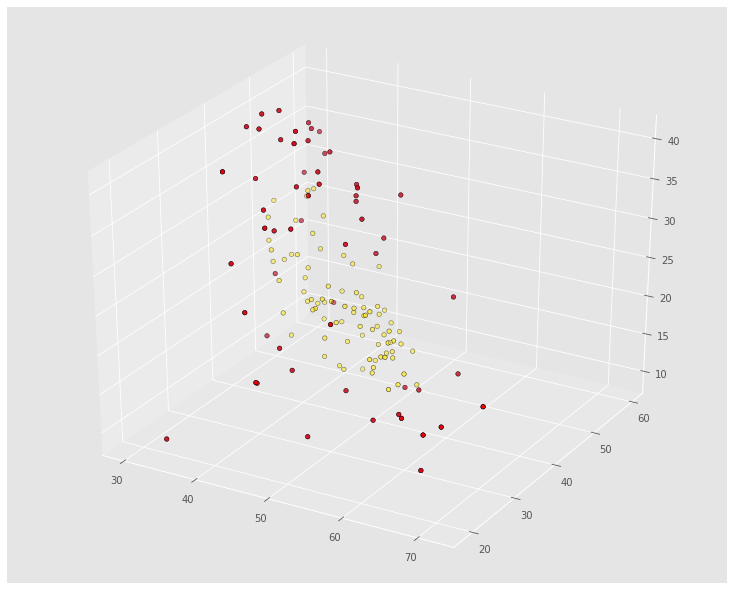

In [ ]:
labels = modeloDbscan.labels_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], c=labels, marker = 'o', edgecolor='black')
ax.scatter(X[labels == -1,0], X[labels == -1,1], X[labels == -1,2], c = 'red', marker='o', edgecolor='black', label ='ruido')
ax.legend
plt.show()
#En este ejercico se aumentó el epsilon y el mínimo de samples 